In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
#Loading non-clinical data
data = {
    'Age' : np.random.randint(20, 80, 100),
    'BMI' : np.random.randint(18, 35, 100),
    'Smoking' : np.random.randint(0, 2, 100),
    'AlcoholConsumption' : np.random.randint(0, 4, 100),
    'PhysicalActivity' : np.random.randint(0, 4, 100),
    'ChronicDisease' : np.random.randint(0, 2, 100)
}
print(data)

{'Age': array([55, 54, 27, 67, 25, 65, 79, 29, 28, 77, 35, 21, 21, 60, 68, 68, 53,
       36, 78, 30, 61, 77, 59, 40, 50, 65, 31, 24, 69, 50, 34, 78, 23, 52,
       51, 23, 50, 50, 34, 59, 27, 20, 29, 40, 79, 68, 59, 36, 75, 77, 49,
       74, 73, 20, 31, 75, 75, 56, 66, 45, 40, 28, 33, 59, 73, 52, 39, 69,
       59, 60, 65, 78, 37, 32, 47, 30, 42, 56, 68, 75, 57, 53, 69, 37, 68,
       44, 57, 72, 41, 78, 47, 67, 52, 26, 49, 76, 29, 53, 22, 31]), 'BMI': array([21, 29, 31, 26, 27, 33, 26, 34, 23, 31, 24, 22, 24, 33, 20, 21, 18,
       23, 29, 28, 31, 25, 22, 29, 20, 33, 33, 24, 24, 27, 29, 34, 26, 34,
       23, 19, 26, 22, 31, 25, 32, 21, 19, 28, 29, 20, 25, 31, 27, 33, 18,
       32, 32, 30, 23, 19, 22, 21, 25, 23, 21, 27, 31, 28, 31, 27, 26, 27,
       32, 19, 27, 18, 19, 25, 25, 32, 21, 22, 34, 29, 27, 30, 31, 19, 30,
       21, 19, 25, 27, 24, 33, 32, 32, 24, 21, 29, 31, 23, 33, 26]), 'Smoking': array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 

In [9]:
#making this dictionary into a Dataframe
non_clinical_data = pd.DataFrame(data)
print(non_clinical_data.head(10))

   Age  BMI  Smoking  AlcoholConsumption  PhysicalActivity  ChronicDisease
0   55   21        0                   1                 0               0
1   54   29        0                   0                 3               0
2   27   31        1                   2                 0               1
3   67   26        0                   0                 0               0
4   25   27        1                   3                 1               0
5   65   33        0                   0                 2               0
6   79   26        0                   2                 2               1
7   29   34        1                   3                 2               0
8   28   23        0                   3                 0               1
9   77   31        1                   0                 1               0


In [6]:
#checking for missing values
print(non_clinical_data.isnull().sum())

Age                   0
BMI                   0
Smoking               0
AlcoholConsumption    0
PhysicalActivity      0
ChronicDisease        0
dtype: int64


In [8]:
#Standardize the features
features = ['Age', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity']
scaler = StandardScaler()
non_clinical_data[features] = scaler.fit_transform(non_clinical_data[features])
print(non_clinical_data)

         Age       BMI   Smoking  AlcoholConsumption  PhysicalActivity  \
0   0.220366 -1.123618 -1.151339           -0.521105         -1.365557   
1   0.165275  0.578833 -1.151339           -1.404333          1.459733   
2  -1.322199  1.004446  0.868554            0.362124         -1.365557   
3   0.881466 -0.059586 -1.151339           -1.404333         -1.365557   
4  -1.432382  0.153221  0.868554            1.245352         -0.423793   
..       ...       ...       ...                 ...               ...   
95  1.377290  0.578833 -1.151339            1.245352         -0.423793   
96 -1.212015  1.004446 -1.151339           -1.404333          1.459733   
97  0.110183 -0.698005  0.868554            1.245352         -0.423793   
98 -1.597657  1.430059 -1.151339            1.245352         -1.365557   
99 -1.101832 -0.059586 -1.151339            1.245352          0.517970   

    ChronicDisease  
0                0  
1                0  
2                1  
3                0  
4     

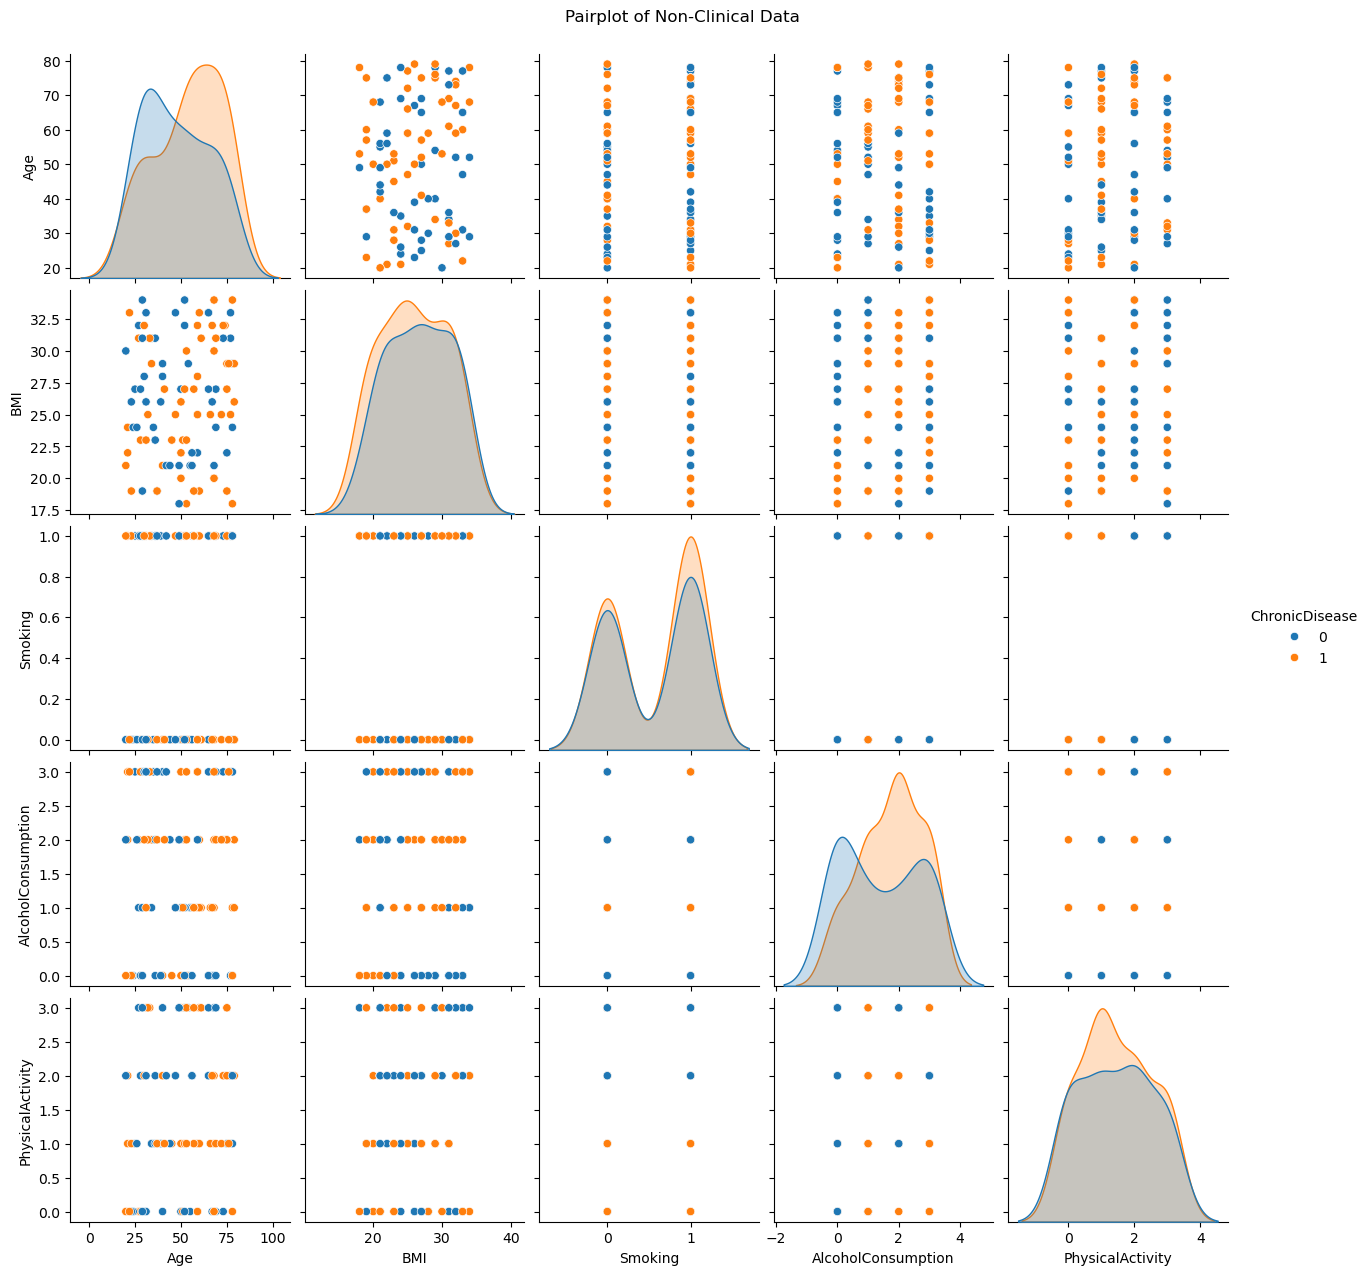

In [10]:
#pairplot for EDA
sns.pairplot(non_clinical_data, hue='ChronicDisease')
plt.suptitle('Pairplot of Non-Clinical Data', y=1.02)
plt.show()

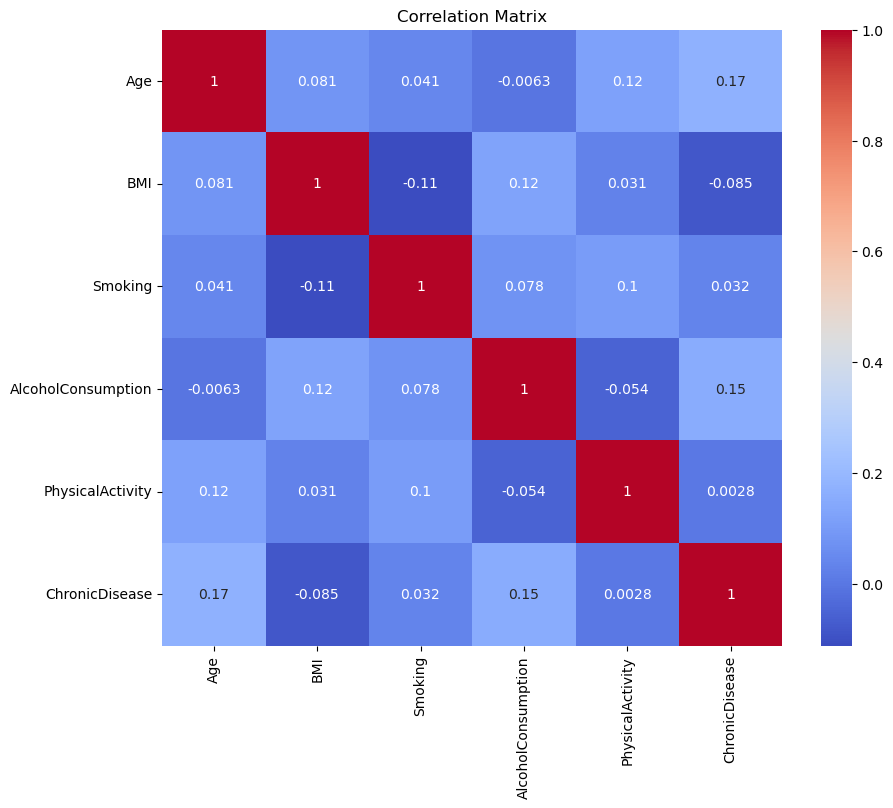

In [11]:
#Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(non_clinical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [29]:
#applying PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(non_clinical_data[features])
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['ChronicDisease'] = non_clinical_data['ChronicDisease']
print(pca_df.head(5))

         PC1       PC2       PC3  ChronicDisease
0  -3.869698  5.383874 -0.097060               0
1  -3.071159 -2.614274  2.111621               0
2  23.897478 -5.255125 -0.690567               1
3 -15.978866  0.688950  0.936446               0
4  25.979861 -1.339837 -1.381218               0


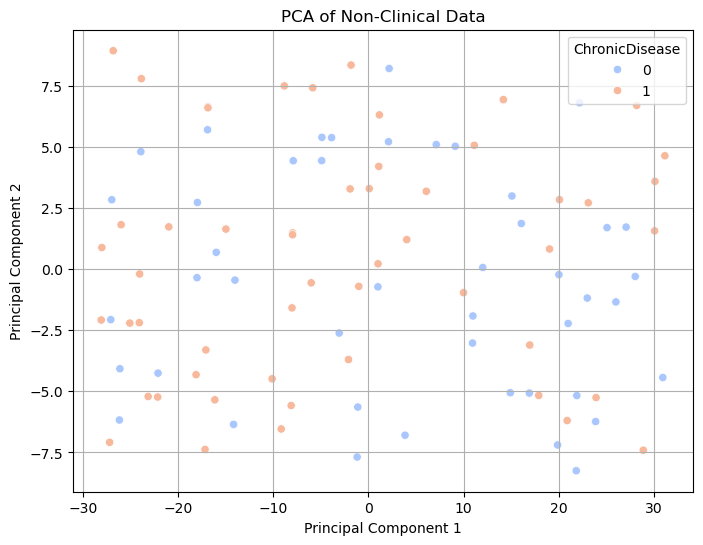

In [16]:
#Plotting the PCA results into a ScatterPlot
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='ChronicDisease', data=pca_df, palette='coolwarm')
plt.title('PCA of Non-Clinical Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

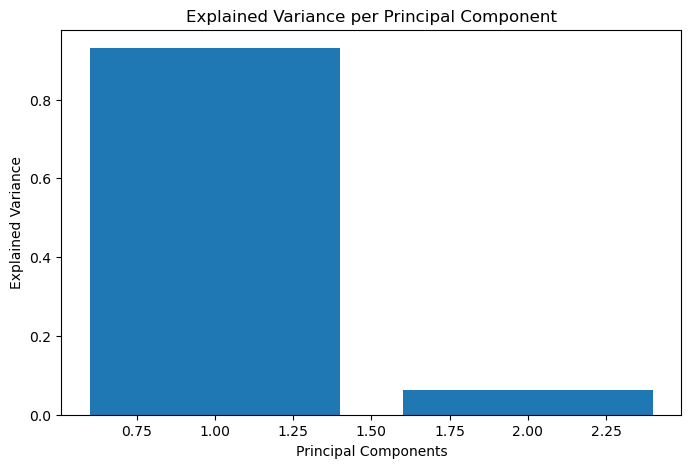

In [23]:
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance per Principal Component')
plt.show()


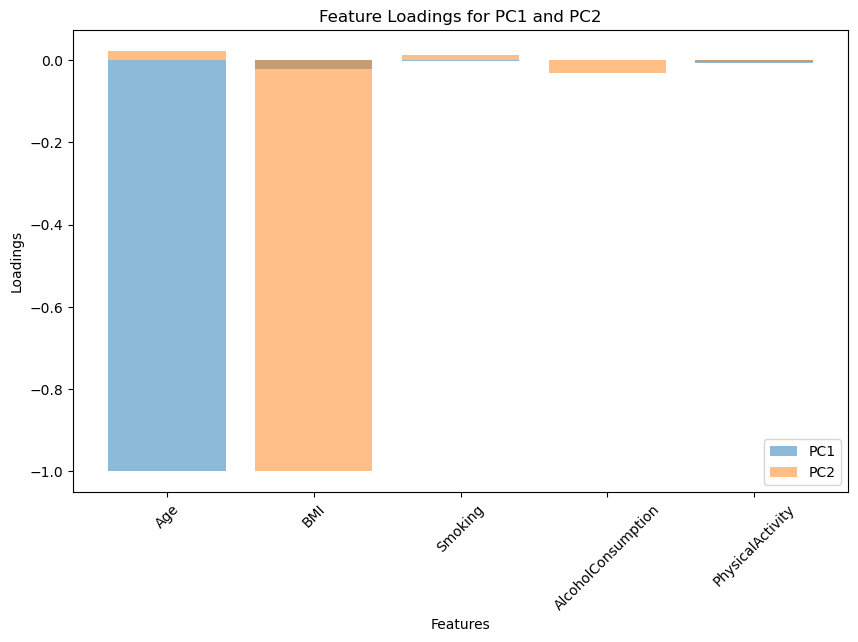

In [25]:
loadings = pca.components_

# Plotting the loadings for the first two components
plt.figure(figsize=(10, 6))
plt.bar(features, loadings[0], label='PC1', alpha=0.5)
plt.bar(features, loadings[1], label='PC2', alpha=0.5)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.title('Feature Loadings for PC1 and PC2')
plt.legend()
plt.show()


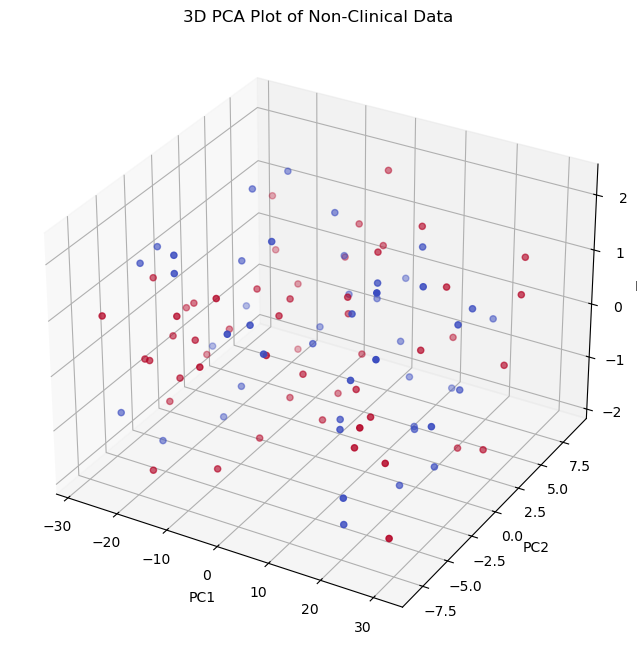

In [30]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming pca_df has 3 components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['ChronicDisease'], cmap='coolwarm')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Plot of Non-Clinical Data')
plt.show()


C:\Users\DSL-189\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DSL-189\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


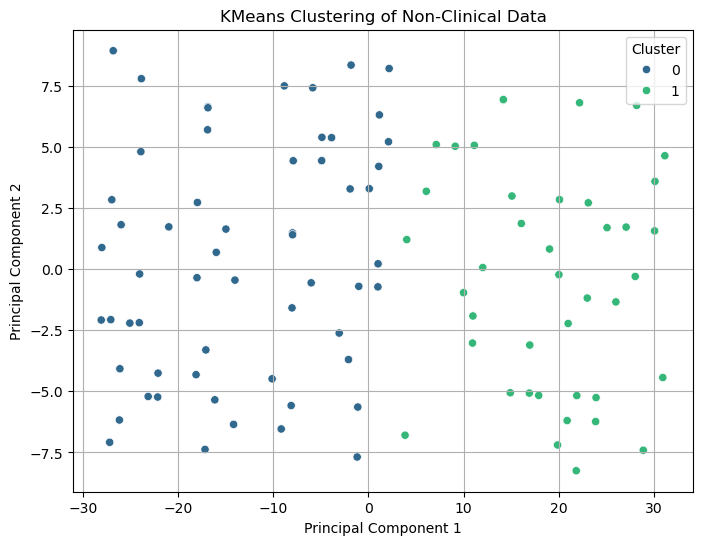

In [32]:
#Applying K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
non_clinical_data['Cluster'] = kmeans.fit_predict(non_clinical_data[features])
pca_df['Cluster'] = non_clinical_data['Cluster']

#Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('KMeans Clustering of Non-Clinical Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# For Iris Dataset

In [39]:
data1 = pd.read_csv("IRIS.csv")
print(data1)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [40]:
#making this dictionary into a Dataframe
non_clinical_data = pd.DataFrame(data1)
print(non_clinical_data.head(10))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [46]:
#checking for missing values
print(non_clinical_data.isnull().sum())

#Standardize the features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
scaler = StandardScaler()
non_clinical_data[features] = scaler.fit_transform(non_clinical_data[features])
print(non_clinical_data)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
     sepal_length  sepal_width  petal_length  petal_width         species
0       -0.900681     1.032057     -1.341272    -1.312977     Iris-setosa
1       -1.143017    -0.124958     -1.341272    -1.312977     Iris-setosa
2       -1.385353     0.337848     -1.398138    -1.312977     Iris-setosa
3       -1.506521     0.106445     -1.284407    -1.312977     Iris-setosa
4       -1.021849     1.263460     -1.341272    -1.312977     Iris-setosa
..            ...          ...           ...          ...             ...
145      1.038005    -0.124958      0.819624     1.447956  Iris-virginica
146      0.553333    -1.281972      0.705893     0.922064  Iris-virginica
147      0.795669    -0.124958      0.819624     1.053537  Iris-virginica
148      0.432165     0.800654      0.933356     1.447956  Iris-virginica
149      0.068662    -0.124958      0.762759     0.790591  Iris-virginica

[150 row

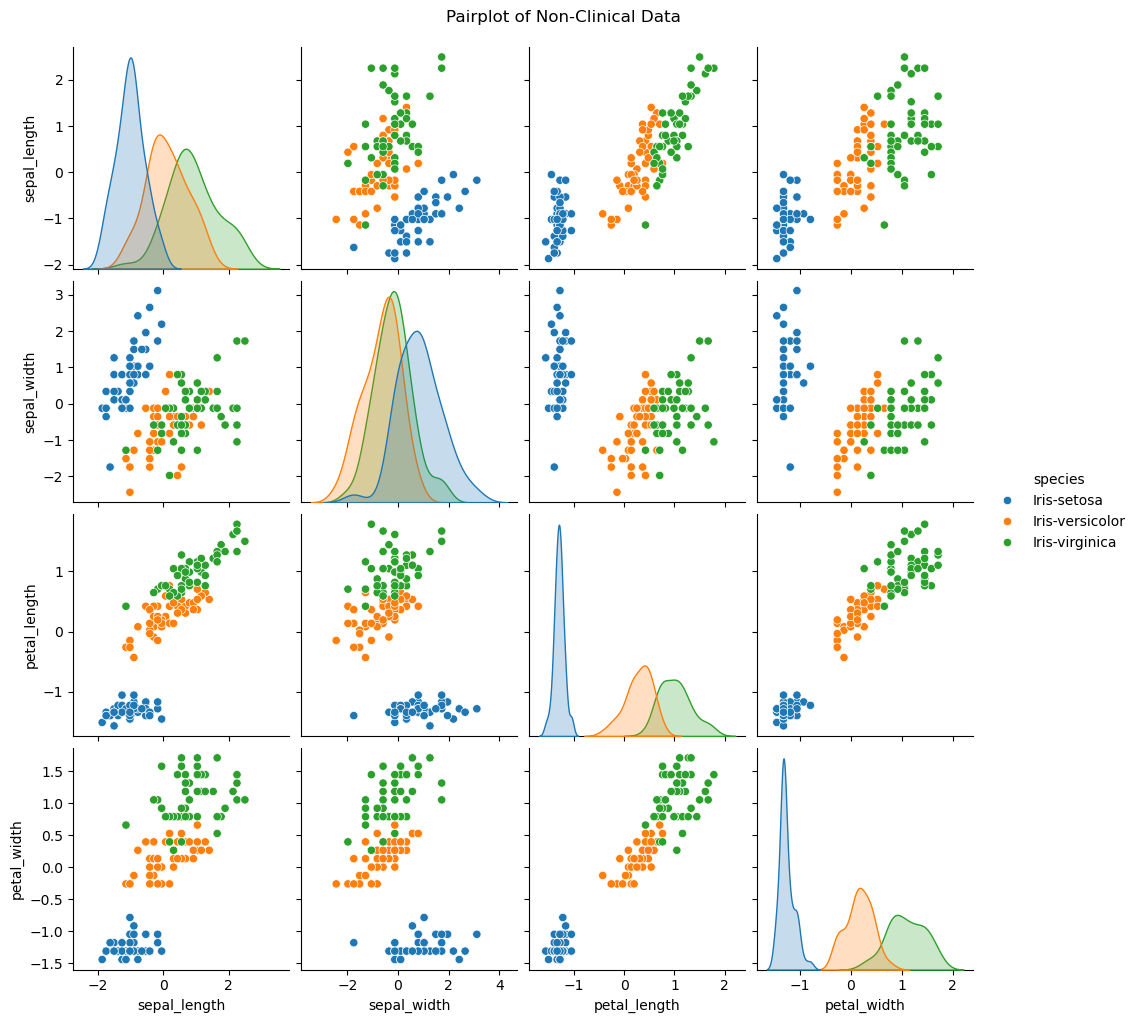

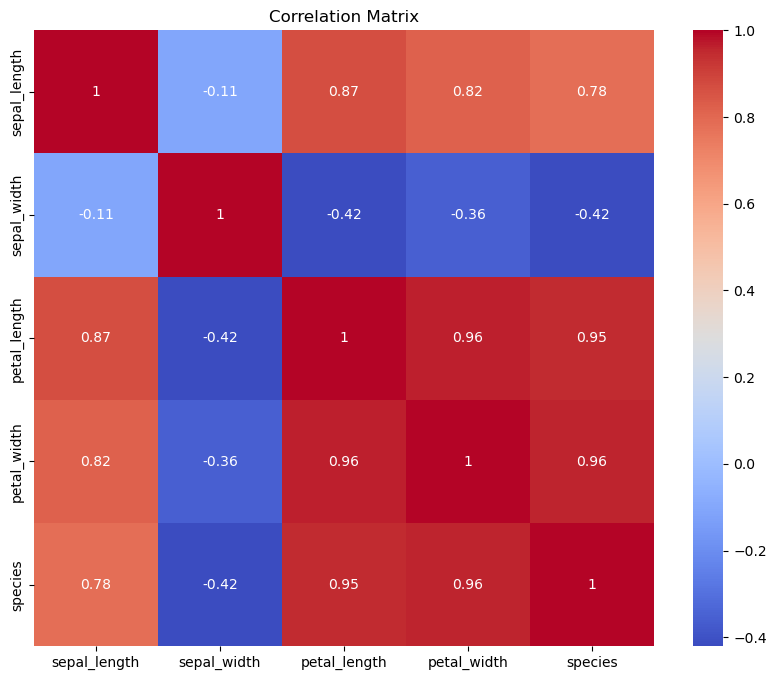

In [49]:
from sklearn.preprocessing import LabelEncoder

#pairplot for EDA
sns.pairplot(non_clinical_data, hue='species')
plt.suptitle('Pairplot of Non-Clinical Data', y=1.02)
plt.show()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert the 'species' column to numeric values
non_clinical_data['species'] = label_encoder.fit_transform(non_clinical_data['species'])

#Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(non_clinical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [53]:
#applying PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(non_clinical_data[features])
pca_df1 = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df1['species'] = non_clinical_data['species']
print(pca_df.head(5))

        PC1       PC2       PC3  species  Cluster
0 -2.264542  0.505704 -0.121943        0        0
1 -2.086426 -0.655405 -0.227251        0        0
2 -2.367950 -0.318477  0.051480        0        0
3 -2.304197 -0.575368  0.098860        0        0
4 -2.388777  0.674767  0.021428        0        0


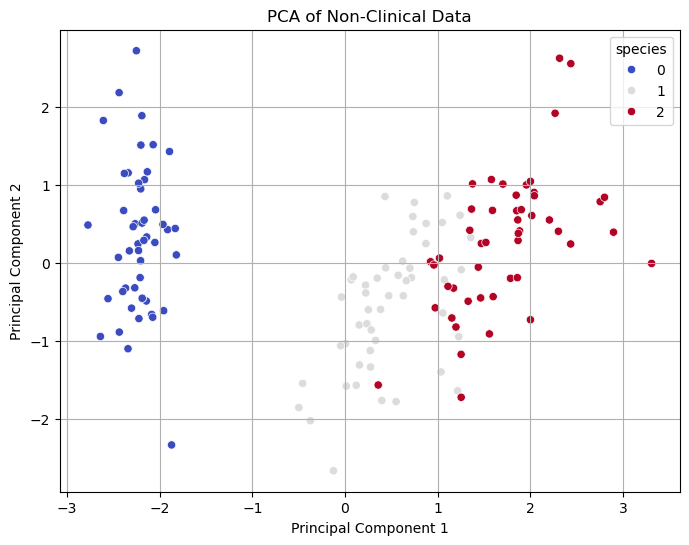

In [54]:
#Plotting the PCA results into a ScatterPlot
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='coolwarm')
plt.title('PCA of Non-Clinical Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

C:\Users\DSL-189\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DSL-189\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


AttributeError: PathCollection.set() got an unexpected keyword argument 'z'

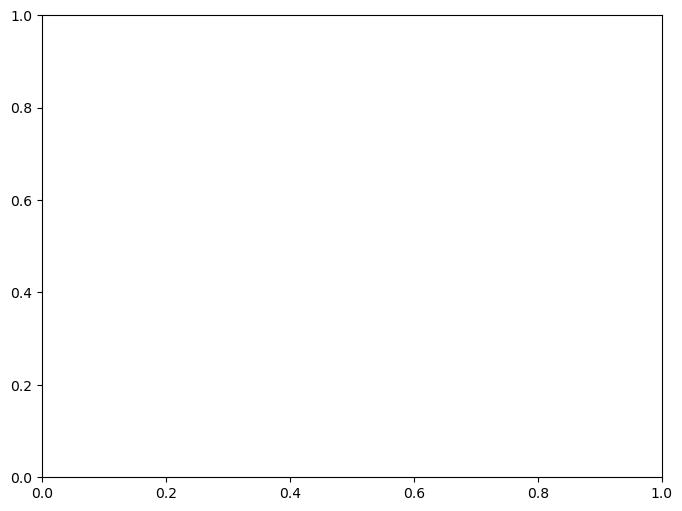

In [58]:
#Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
non_clinical_data['Cluster'] = kmeans.fit_predict(non_clinical_data[features])
pca_df1['Cluster'] = non_clinical_data['Cluster']

#Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2',z='PC3', hue='Cluster', data=pca_df, palette='viridis')
plt.title('KMeans Clustering of Non-Clinical Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()